
**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so the task is to apply data science skills to help them identify groups in the dataset!

# Importing Libraries

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler



# Data Exploration & Cleaning

In [24]:
# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [25]:
penguins_df.shape

(344, 5)

### Handling missing values

In [26]:
penguins_df.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [27]:
penguins_clean = penguins_df.dropna()

### Handling Outliers

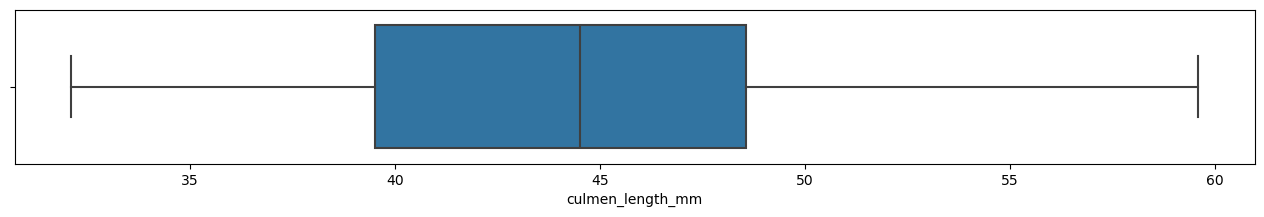

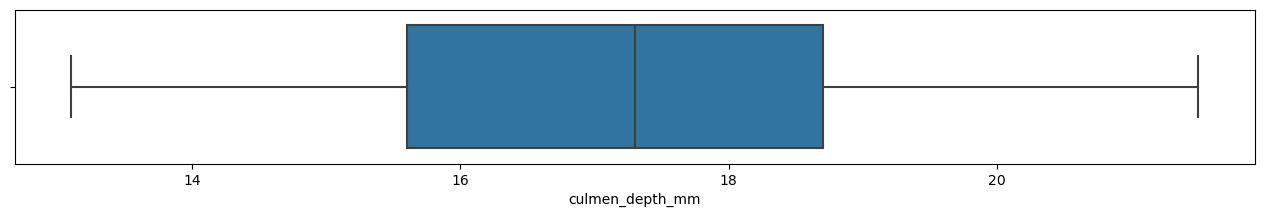

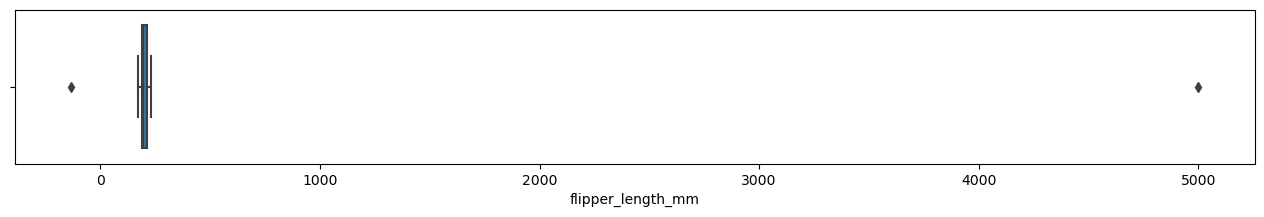

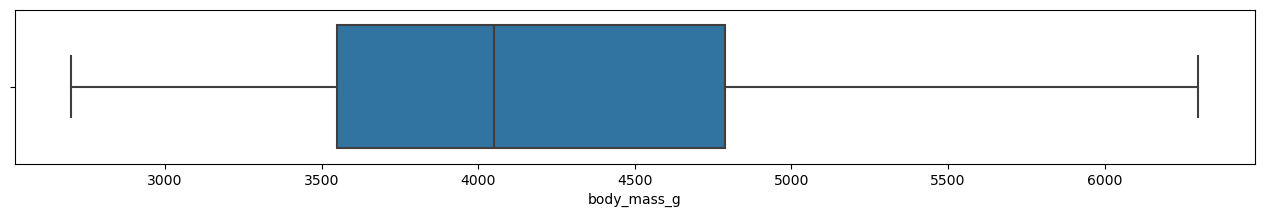

In [28]:
for col in penguins_clean.describe().columns:
    plt.figure(figsize=(16,2))
    sns.boxplot(data=penguins_clean, x=col)
    plt.show()

In [29]:
penguins_clean = penguins_clean.drop(penguins_clean[penguins_clean['flipper_length_mm'] > 1000].index)
penguins_clean = penguins_clean.drop(penguins_clean[penguins_clean['flipper_length_mm'] < 0].index)

penguins_clean.reset_index(drop=True, inplace=True)
penguins_clean.shape


(333, 5)

# Data Preprocessing

### One Hot Encoding

In [30]:
dummies = pd.get_dummies(penguins_clean['sex'], drop_first=True)
dummies

,FEMALE,MALE
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
328,True,False
329,True,False
330,False,True
331,True,False


In [31]:
penguins_preprocessed = pd.concat([penguins_clean,dummies], axis = 'columns')
penguins_preprocessed

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,FEMALE,MALE
0,39.1,18.7,181.0,3750.0,MALE,False,True
1,39.5,17.4,186.0,3800.0,FEMALE,True,False
2,40.3,18.0,195.0,3250.0,FEMALE,True,False
3,36.7,19.3,193.0,3450.0,FEMALE,True,False
4,39.3,20.6,190.0,3650.0,MALE,False,True
...,...,...,...,...,...,...,...
328,47.2,13.7,214.0,4925.0,FEMALE,True,False
329,46.8,14.3,215.0,4850.0,FEMALE,True,False
330,50.4,15.7,222.0,5750.0,MALE,False,True
331,45.2,14.8,212.0,5200.0,FEMALE,True,False


In [32]:
penguins_preprocessed.drop(columns=['sex'], inplace = True)
penguins_preprocessed

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE
0,39.1,18.7,181.0,3750.0,False,True
1,39.5,17.4,186.0,3800.0,True,False
2,40.3,18.0,195.0,3250.0,True,False
3,36.7,19.3,193.0,3450.0,True,False
4,39.3,20.6,190.0,3650.0,False,True
...,...,...,...,...,...,...
328,47.2,13.7,214.0,4925.0,True,False
329,46.8,14.3,215.0,4850.0,True,False
330,50.4,15.7,222.0,5750.0,False,True
331,45.2,14.8,212.0,5200.0,True,False


### Scaling Data

In [33]:
scaler = StandardScaler()
scaler.fit(penguins_preprocessed)

StandardScaler()

In [34]:
scaled_data = scaler.transform(penguins_preprocessed)
penguins_preprocessed = pd.DataFrame(data = scaled_data, columns = penguins_preprocessed.columns)
penguins_preprocessed

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001
...,...,...,...,...,...,...
328,0.584511,-1.763116,0.925454,0.890339,1.009050,-1.003008
329,0.510929,-1.456367,0.996775,0.797145,1.009050,-1.003008
330,1.173166,-0.740619,1.496019,1.915480,-0.991031,0.997001
331,0.216602,-1.200743,0.782813,1.232053,1.009050,-1.003008


### Principal Component Analysis (PCA)

In [35]:
pca = PCA()
pca.fit(penguins_preprocessed)


PCA()

In [36]:
pca.explained_variance_ratio_

array([0.51973484, 0.34424041, 0.08591863, 0.03225427, 0.01686049,
       0.00099136])

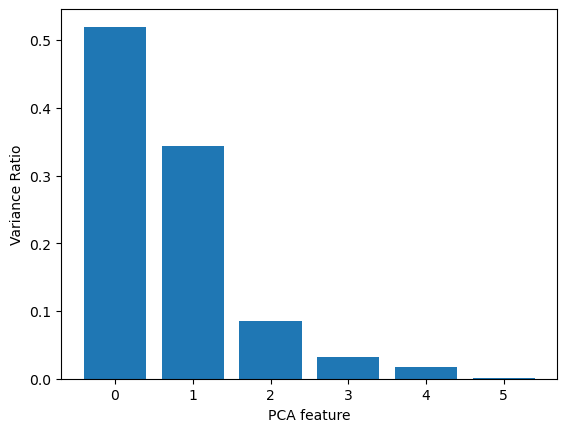

In [37]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.ylabel('Variance Ratio')
plt.xlabel('PCA feature')
plt.show()


In [38]:
pca = PCA(n_components = 2)
penguins_pca = pca.fit_transform(penguins_preprocessed)
penguins_pca

array([[-7.29520694e-01, -2.09719199e+00],
       [-1.92930440e+00,  4.12149703e-01],
       [-1.95352479e+00,  3.08485398e-01],
       [-2.28817761e+00, -1.58277726e-01],
       [-6.21821649e-01, -2.51402049e+00],
       [-2.29152165e+00,  1.26445549e-01],
       [ 2.70680676e-01, -1.85613349e+00],
       [-2.33416049e+00,  1.50781067e-01],
       [-5.97023288e-01, -2.65728372e+00],
       [-2.29097852e+00,  1.91722418e-01],
       [-2.03556313e+00,  1.40926894e-02],
       [ 4.03586127e-01, -2.13984589e+00],
       [-2.78682640e+00, -1.42762052e-01],
       [ 3.26341981e-01, -2.46479526e+00],
       [-2.80192041e+00, -2.54639414e-01],
       [-9.70630285e-01, -2.17804104e+00],
       [-2.25960046e+00, -1.47648262e-01],
       [-4.89541085e-01, -1.79101648e+00],
       [-6.35131373e-01, -1.64334482e+00],
       [-2.35187589e+00, -1.08021864e-01],
       [-6.59573801e-01, -2.04230703e+00],
       [-2.23509243e+00,  1.56193095e-01],
       [-3.04481322e+00, -4.48467094e-01],
       [-5.

# Clustering using K-Means

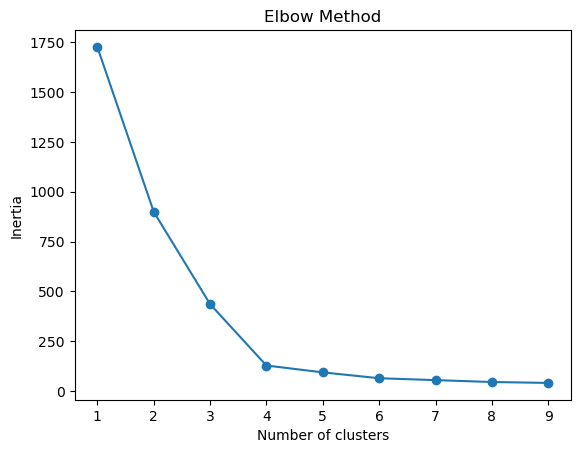

In [39]:
inertia = []
for cluster in range(1, 10):
    kmeans = KMeans(n_clusters=cluster, random_state=42)
    kmeans.fit(penguins_pca)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

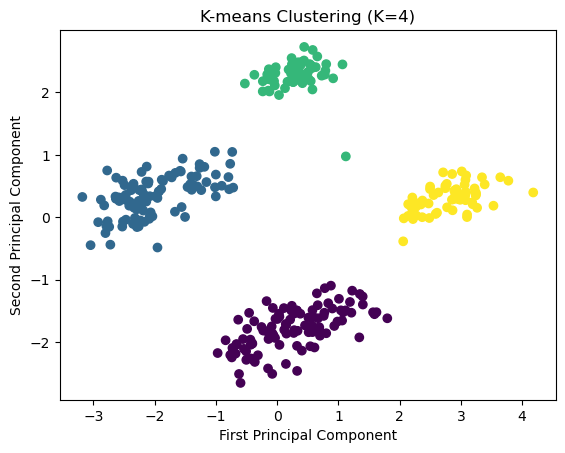

In [40]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(penguins_pca)
plt.scatter(penguins_pca[:, 0], penguins_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K=4)')
plt.show()

In [41]:
penguins_clean['label'] = kmeans.labels_

In [42]:
penguins_clean

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,label
0,39.1,18.7,181.0,3750.0,MALE,0
1,39.5,17.4,186.0,3800.0,FEMALE,1
2,40.3,18.0,195.0,3250.0,FEMALE,1
3,36.7,19.3,193.0,3450.0,FEMALE,1
4,39.3,20.6,190.0,3650.0,MALE,0
...,...,...,...,...,...,...
328,47.2,13.7,214.0,4925.0,FEMALE,2
329,46.8,14.3,215.0,4850.0,FEMALE,2
330,50.4,15.7,222.0,5750.0,MALE,3
331,45.2,14.8,212.0,5200.0,FEMALE,2


In [43]:
penguins_clean.groupby('label').agg({'culmen_length_mm': 'mean', 
                                     'culmen_depth_mm': 'mean', 
                                     'flipper_length_mm': 'mean',
                                     'body_mass_g': 'mean'})

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,43.878302,19.111321,194.764151,4006.603774
1,40.217757,17.611215,189.046729,3419.158879
2,45.545763,14.262712,212.779661,4683.050847
3,49.473770,15.718033,221.540984,5484.836066
